#  PHONE MESSAGE SPAM ANALYSIS USING R


As worldwide use of mobile phones has grown, a new avenue for electronic junk mail has been opened for disreputable marketers. These advertisers utilize Short Message Service (SMS) text messages to target potential consumers with unwanted advertising known as SMS spam. This type of spam is particularly troublesome because, unlike email spam, many cellular phone users pay a fee per SMS received. Developing a classification algorithm that could filter SMS spam would provide a useful tool for cellular phone providers. Since naive Bayes has been used successfully for email spam filtering, it seems likely that it could also be applied to SMS spam. However, relative to email spam, SMS spam poses additional challenges for automated filters. SMS messages are often limited to 160 characters, reducing the amount of text that can be used to identify whether a message is junk. The limit, combined with small mobile phone keyboards, has led many to adopt a form of SMS shorthand lingo, which further blurs the line between legitimate messages and spam. 


## STEP 1- Collecting Data


##### To develop the *MACHINE LEARNING MODEL*, we will use data adapted from the SMS Spam Collection at       http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/. 
This dataset includes the text of SMS messages along with a label indicating whether the message is unwanted.Junk messages are labeled spam, while legitimate messages are labeled ham.

Some examples of spam and ham are shown in the following example: 

###### The following is a sample ham message

*Better. Made up for Friday and stuffed myself like a pig yesterday. Now I feel bleh. But at least its not writhing pain kind of bleh.*

###### The following is a sample spam message

*Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066*

## STEP 2- Exploring and preparing the data

The first step towards constructing our *machine learning model* involves *processing the raw data for analysis*. Text data are challenging to prepare because it is necessary to transform the words and sentences into a form that a computer can understand. We will transform our data into a representation known as *bag-of-words*, which ignores the order that words appear in and simply provides a variable indicating whether the word appears at all.

###### Importing the data set
the data is present in csv format so we will use the function *read.csv()* to import the data

In [1]:
text=read.csv("F:/Machine Learning/spam.csv",stringsAsFactors=FALSE)

In [2]:
str(text)

'data.frame':	5572 obs. of  5 variables:
 $ v1 : chr  "ham" "ham" "spam" "ham" ...
 $ v2 : chr  "Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..." "Ok lar... Joking wif u oni..." "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question("| __truncated__ "U dun say so early hor... U c already then say..." ...
 $ X  : chr  "" "" "" "" ...
 $ X.1: chr  "" "" "" "" ...
 $ X.2: chr  "" "" "" "" ...


In [3]:
head(text)

v1,v2,X,X.1,X.2
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",,,


In [4]:
tail(text)

,v1,v2,X,X.1,X.2
5567,spam,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",,,
5568,spam,"This is the 2nd time we have tried 2 contact u. U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",,,
5569,ham,Will Ì_ b going to esplanade fr home?,,,
5570,ham,"Pity, * was in mood for that. So...any other suggestions?",,,
5571,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,,,
5572,ham,Rofl. Its true to its name,,,


In [5]:
text$v1=factor(text$v1)

In [6]:
str(text$v1)

 Factor w/ 2 levels "ham","spam": 1 1 2 1 1 2 1 1 2 2 ...


In [7]:
table(text$v1)


 ham spam 
4825  747 

##### Importing package tm
It is a text mining package which provides easy access to preprocessing and manipulation mechanisms such as whitespace removal, stemming, or stopword deletion. 

In [10]:
library(tm)

The first step in processing text data involves creating a corpus, which refers to a collection of text documents. In our project, a text document refers to a single SMS message. We'll build a corpus containing the SMS messages in the training data using the following command: 

In [11]:
text_corpus= Corpus(VectorSource(text$v2)) 

In [12]:
print(text_corpus)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5572


In [13]:
inspect(text_corpus[1:3])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3

[1] Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                            
[2] Ok lar... Joking wif u oni...                                                                                                                              
[3] Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


Before splitting the text into words, we will need to perform some common cleaning steps in order to remove punctuation and other characters that may clutter the result. For example, we would like to count hello!, HELLO..., and Hello as instances of the word hello

*The function tm_map() provides a method for transforming (that is, mapping) a tm corpus. We will use this to clean up our corpus using a series of transformation functions, and save the result in a new object called clean*

First, we will convert all of the SMS messages to lowercase and remove any numbers:


In [15]:
clean=tm_map(text_corpus,tolower)

Warning message in tm_map.SimpleCorpus(text_corpus, tolower):
"transformation drops documents"

Now we will remove numbers from the corpus


In [16]:
clean=tm_map(clean,removeNumbers)

Warning message in tm_map.SimpleCorpus(clean, removeNumbers):
"transformation drops documents"

*A common practice when analyzing text data is to remove filler words such as to, and, but, and or. These are known as stop words. Rather than define a list of stop words ourselves, we will use the stopwords() function provided by the tm package. It contains a set of numerous stop words. To see them all, type stopwords() at the command line. As we did before, we'll use the* tm_map() *function to apply this function to the data*



Below are the stop words which are included in tm package

In [17]:
stopwords()

[1] "i"          "me"         "my"         "myself"     "we"        
  [6] "our"        "ours"       "ourselves"  "you"        "your"      
 [11] "yours"      "yourself"   "yourselves" "he"         "him"       
 [16] "his"        "himself"    "she"        "her"        "hers"      
 [21] "herself"    "it"         "its"        "itself"     "they"      
 [26] "them"       "their"      "theirs"     "themselves" "what"      
 [31] "which"      "who"        "whom"       "this"       "that"      
 [36] "these"      "those"      "am"         "is"         "are"       
 [41] "was"        "were"       "be"         "been"       "being"     
 [46] "have"       "has"        "had"        "having"     "do"        
 [51] "does"       "did"        "doing"      "would"      "should"    
 [56] "could"      "ought"      "i'm"        "you're"     "he's"      
 [61] "she's"      "it's"       "we're"      "they're"    "i've"      
 [66] "you've"     "we've"      "they've"    "i'd"        "you'd"     
 [71] "he'd"       "she'd"      "we'd"       "they'd"     "i'll"      
 [76] "you'll"     "he'll"      "she'll"     "we'll"      "they'll"   
 [81] "isn't"      "aren't"     "wasn't"     "weren't"    "hasn't"    
 [86] "haven't"    "hadn't"     "doesn't"    "don't"      "didn't"    
 [91] "won't"      "wouldn't"   "shan't"     "shouldn't"  "can't"     
 [96] "cannot"     "couldn't"   "mustn't"    "let's"      "that's"    
[101] "who's"      "what's"     "here's"     "there's"    "when's"    
[106] "where's"    "why's"      "how's"      "a"          "an"        
[111] "the"        "and"        "but"        "if"         "or"        
[116] "because"    "as"         "until"      "while"      "of"        
[121] "at"         "by"         "for"        "with"       "about"     
[126] "against"    "between"    "into"       "through"    "during"    
[131] "before"     "after"      "above"      "below"      "to"        
[136] "from"       "up"         "down"       "in"         "out"       
[141] "on"         "off"        "over"       "under"      "again"     
[146] "further"    "then"       "once"       "here"       "there"     
[151] "when"       "where"      "why"        "how"        "all"       
[156] "any"        "both"       "each"       "few"        "more"      
[161] "most"       "other"      "some"       "such"       "no"        
[166] "nor"        "not"        "only"       "own"        "same"      
[171] "so"         "than"       "too"        "very"

In [18]:
clean=tm_map(clean,removeWords,stopwords())

Warning message in tm_map.SimpleCorpus(clean, removeWords, stopwords()):
"transformation drops documents"

We'll also remove punctuation:


In [19]:
clean=tm_map(clean,removePunctuation)

Warning message in tm_map.SimpleCorpus(clean, removePunctuation):
"transformation drops documents"

Now that we have removed numbers, stop words, and punctuation, the text messages are left with blank spaces where these characters used to be. The last step then is to remove additional whitespace, leaving only a single space between words.


In [20]:
clean=tm_map(clean,stripWhitespace)

Warning message in tm_map.SimpleCorpus(clean, stripWhitespace):
"transformation drops documents"

In [21]:
clean=tm_map(clean,stemDocument)

Warning message in tm_map.SimpleCorpus(clean, stemDocument):
"transformation drops documents"

### Comparision b/w data before and after cleaning

#### Text before cleaning 

In [22]:
inspect(text_corpus[1:3])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3

[1] Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                            
[2] Ok lar... Joking wif u oni...                                                                                                                              
[3] Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


#### Text After Cleaning

In [23]:
inspect(clean[1:3])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 3

[1] go jurong point crazi avail bugi n great world la e buffet cine got amor wat                         
[2] ok lar joke wif u oni                                                                                
[3] free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli s


### Tokenization 

Now that the data are processed to our liking, the final step is to split the messages into individual components through a process called tokenization. A token is a single element of a text string; in this case, the tokens are words.

As you might assume, the tm package provides functionality to tokenize the SMS message corpus. The DocumentTermMatrix() function will take a corpus and create a data structure called a sparse matrix, in which the rows of the matrix indicate documents (that is, SMS messages) and the columns indicate terms (that is, words). Each cell in the matrix stores a number indicating a count of the times the word indicated by the column appears in the document indicated by the row. 

In [24]:
dtm=DocumentTermMatrix(clean)

In [25]:
dtm


<<DocumentTermMatrix (documents: 5572, terms: 6546)>>
Non-/sparse entries: 42700/36431612
Sparsity           : 100%
Maximal term length: 40
Weighting          : term frequency (tf)

In [48]:
spdtm = removeSparseTerms(dtm, 0.95)
spdtm
textd = as.data.frame(as.matrix(spdtm))
colnames(textd) = make.names(colnames(textd))
textd$spam = text$v1
textd$spam = as.factor(textd$spam)

<<DocumentTermMatrix (documents: 5572, terms: 7)>>
Non-/sparse entries: 2840/36164
Sparsity           : 93%
Maximal term length: 4
Weighting          : term frequency (tf)

# Visualizing Data using wordclouds

A word cloud is a way to visually depict the frequency at which words appear in text data. The cloud is made up of words scattered somewhat randomly around the figure. Words appearing more often in the text are shown in a larger font, while less common terms are shown in smaller fonts. This type of figure has grown in popularity recently since it provides a way to observe trending topics on social media websites.

In [27]:
library(wordcloud)

## Wordcloud for the data set

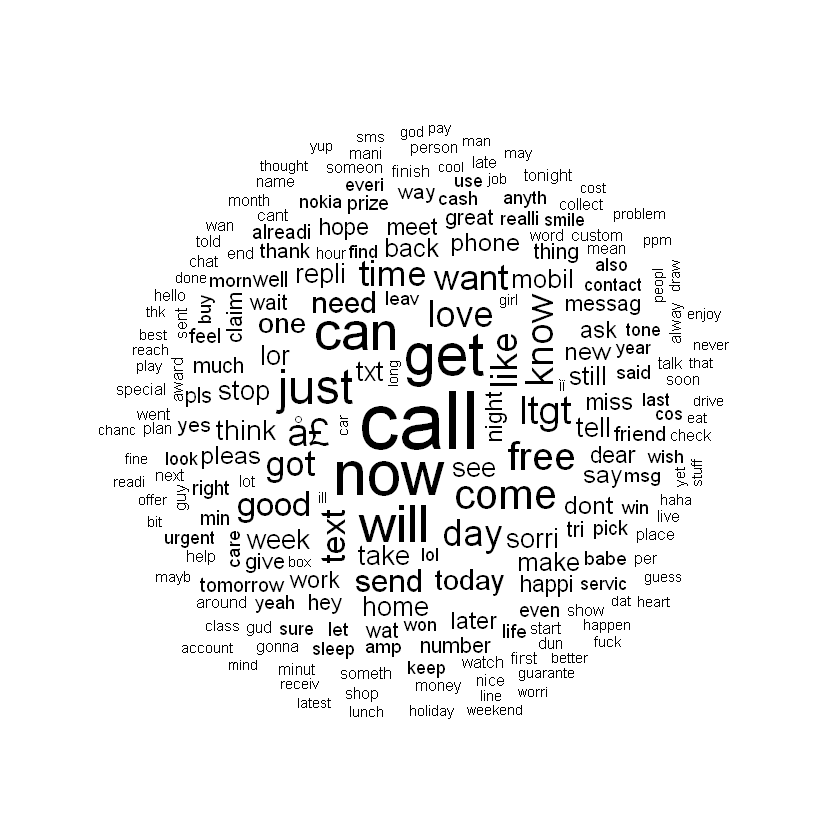

In [29]:
wordcloud(clean, min.freq = 40, random.order = FALSE) 

## Wordcloud for spam messages

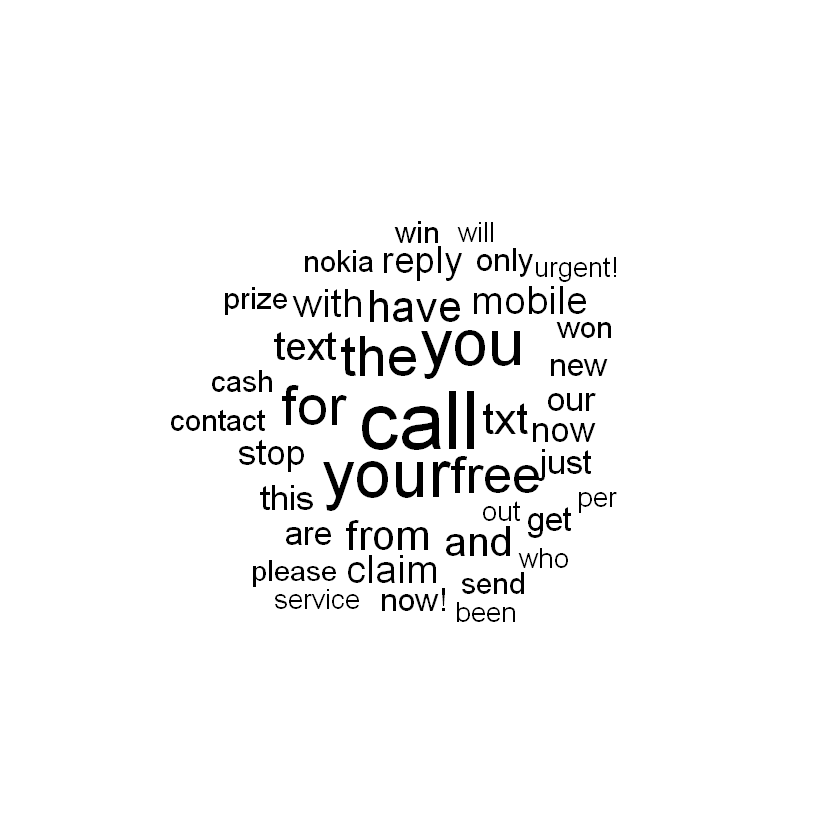

In [46]:
spam = subset(text, v1 == "spam")
spam=Corpus(VectorSource(spam$v2))
wordcloud(spam, max.words = 40, scale = c(4,1),random.order=FALSE) 

## Wordcloud for ham messages

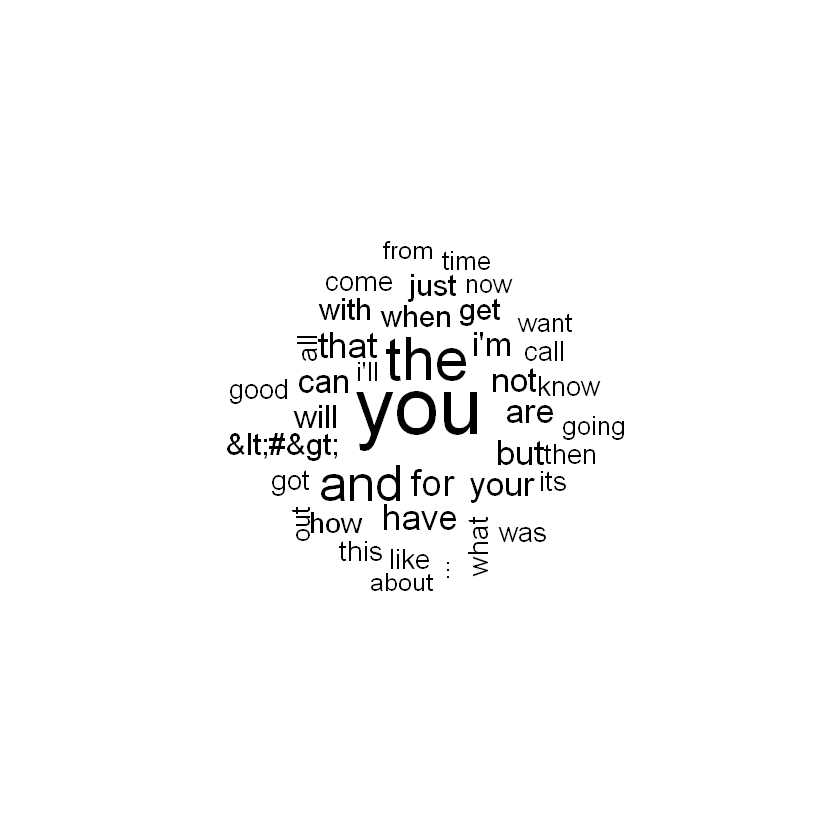

In [47]:
ham =subset(text, v1== "ham")
ham=Corpus(VectorSource(ham$v2))
wordcloud(ham, max.words = 40, scale = c(4, 1),random.order = FALSE) 

## Spliting the dataset
Creating Training and Testing Datasets

In [68]:
library(caTools)
set.seed(123)
spl <- sample.split(textd$spam, 0.7)
train <- subset(textd, spl == TRUE)
test <- subset(textd,spl==FALSE)

# Step-3 Building Machine Learning Models

## Building a Naive Bayes Classifier

In machine learning, naïve Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features. They are among the simplest Bayesian network models. 

In [69]:
library(e1071)
sms_classifier<- naiveBayes(train,train$spam,laplace=1)
sms_pred <- predict(sms_classifier,test)

## Building a SVM Model

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier

In [97]:
model_svm<-svm(as.factor(train$spam)~.,data=train)
pred_svm<-predict(model_svm,test)

## Building a Decision Tree Model

Decision Trees are a class of very powerful Machine Learning model cable of achieving high accuracy in many tasks while being highly interpretable. What makes decision trees special in the realm of ML models is really their clarity of information representation.

In [99]:
library(rpart)
model_dtree<-rpart(train$spam~.,method='class',data=train,parms = list (split = 'information'))
pred<-predict(model_dtree,test,type=c("class"))

## Building a Logistic Regression Model
Logistic Regression In R. It is a technique to analyse a data-set which has a dependent variable and one or more independent variables to predict the outcome in a binary variable, meaning it will have only two outcomes. The dependent variable is categorical in nature

In [100]:
mylogit <- glm(train$spam ~., data = train, family = "binomial")
p<-predict(mylogit, newdata=test, type="response")

# Evaluating and Comparing Models


### Checking the accuracy using crosstable

#### Naive Bayes Model

In [101]:
library(gmodels)
CrossTable(sms_pred,test$spam,prop.chisq = FALSE, chisq = FALSE,prop.t = FALSE,dnn = c("Predicted", "Actual"))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1671 

 
             | Actual 
   Predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1416 |         5 |      1421 | 
             |     0.996 |     0.004 |     0.850 | 
             |     0.979 |     0.022 |           | 
-------------|-----------|-----------|-----------|
        spam |        31 |       219 |       250 | 
             |     0.124 |     0.876 |     0.150 | 
             |     0.021 |     0.978 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1447 |       224 |      1671 | 
             |     0.866 |     0.134 |           | 
-------------|-----------|-----------|-----------|

 


The Naive Bayes model performs with nearly 97 percent accuracy , as we can see in the cross table 97.9 percent of the actual ham messages of the testing data are classified as ham and 97.8 percent of the spam messages of testing data are classified as spam by the naive bayes classifier ,hence we can say that it does classification nicely

#### SVM Model

In [72]:
CrossTable(pred_svm,test$spam,prop.chisq = FALSE, chisq = FALSE,prop.t = FALSE,dnn = c("Predicted", "Actual"))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1671 

 
             | Actual 
   Predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1382 |       119 |      1501 | 
             |     0.921 |     0.079 |     0.898 | 
             |     0.955 |     0.531 |           | 
-------------|-----------|-----------|-----------|
        spam |        65 |       105 |       170 | 
             |     0.382 |     0.618 |     0.102 | 
             |     0.045 |     0.469 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1447 |       224 |      1671 | 
             |     0.866 |     0.134 |           | 
-------------|-----------|-----------|-----------|

 


The SVM Model performs very nicely in classifying ham messages as ham but it lacks in classifying spam messages as spam as we can draw that conclusion from the cross table where 119 spam messages are classified as ham and this is a huge drawback of this model when dealing with this dataset

#### Decision Tree Model

In [77]:
CrossTable(pred,test$spam,prop.chisq = FALSE, chisq = FALSE,prop.t = FALSE,dnn = c("Predicted", "Actual"))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1671 

 
             | Actual 
   Predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
         ham |      1368 |       120 |      1488 | 
             |     0.919 |     0.081 |     0.890 | 
             |     0.945 |     0.536 |           | 
-------------|-----------|-----------|-----------|
        spam |        79 |       104 |       183 | 
             |     0.432 |     0.568 |     0.110 | 
             |     0.055 |     0.464 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1447 |       224 |      1671 | 
             |     0.866 |     0.134 |           | 
-------------|-----------|-----------|-----------|

 


The Decision Tree Model performs very nicely in classifying ham messages as ham but it lacks in classifying spam messages as spam as we can draw that conclusion from the cross table where 120 spam messages are classified as ham and this is a huge drawback of this model when dealing with this dataset

#### Logistic Regression Model

In [106]:
CrossTable(p>0.5,test$spam,prop.chisq = FALSE, chisq = FALSE,prop.t = FALSE,dnn = c("Predicted", "Actual"))


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  1671 

 
             | Actual 
   Predicted |       ham |      spam | Row Total | 
-------------|-----------|-----------|-----------|
       FALSE |      1424 |       180 |      1604 | 
             |     0.888 |     0.112 |     0.960 | 
             |     0.984 |     0.804 |           | 
-------------|-----------|-----------|-----------|
        TRUE |        23 |        44 |        67 | 
             |     0.343 |     0.657 |     0.040 | 
             |     0.016 |     0.196 |           | 
-------------|-----------|-----------|-----------|
Column Total |      1447 |       224 |      1671 | 
             |     0.866 |     0.134 |           | 
-------------|-----------|-----------|-----------|

 


The Logistic Regression Model performs badly in classifying spam messages as spam as we can draw that conclusion from the cross table where 180 spam messages are classified as ham and this is a huge drawback of this model when dealing with this dataset

# Conclusion 

#### The model best suited for classifing this kind of data i.e text messages is Naive Bayes as it not only classifies the ham messages correctly but it classifies  the spam messages correctly too with 97 percent accuracy which cannot be observed while evaluating other model so it is best to use Naive Bayes for this classification.

In [ ]:
keyword to associate with spam,attribute (label lottery prize ,special offer,banking(keywords baaki drop ))
*deep.kumar@dituniversity.edu.in*